# Milestone 2: Data Ingestion Pipeline

Objective: Build daily data ingestion workflow.

 Deliverables:

o Sales history and inventory ingestion pipeline.

 Evaluation:

o Daily ingestion runs successfully without errors.


🔹 What is a Pipeline?

A pipeline means a series of steps or stages that data passes through —
from raw input → cleaned data → processed data → final output (like a trained ML model or report).

It’s called a “pipeline” because data flows through it step by step —
just like water flows through connected pipes 🚰.

🔹 Where Pipelines Are Used?

Pipelines are used wherever data or machine learning processes need to be automated, repeated, or handled step by step.

## Objective: Build daily data ingestion workflow.

In [16]:
# PIPELINES
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Sample dataset
data = {
    "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
    "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
}

df = pd.DataFrame(data)

# Define a function to create a pipeline
def create_pipeline():
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Create a pipeline for numerical features
    numerical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
        ('scaler', StandardScaler())  # Scale features using StandardScaler
    ])
    
    # Create a preprocessing pipeline
    preprocessing_pipeline = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features)
        ]
    )
    
    return preprocessing_pipeline

from sklearn.compose import ColumnTransformer

# Create the pipeline
pipeline = create_pipeline()

# Fit and transform the data
transformed_data = pipeline.fit_transform(df)

# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=df.select_dtypes(include=['int64', 'float64']).columns)

print(transformed_df)


   Number_of_Riders  Number_of_Drivers  Historical_Cost_of_Ride
0          1.140587           1.215895                -0.405674
1         -0.614162           0.722965                -1.183800
2         -1.491537           0.065724                -0.084659
3          1.085751          -0.180741                 0.905118
4          0.482556          -0.673672                 1.676885
5         -0.559326           0.394344                -0.013037
6          1.305094           1.051585                -1.675939
7         -0.394818           0.722965                -0.747182
8          0.537392          -1.330913                 1.125143
9         -1.491537          -1.988153                 0.403145


Conclusion

In this code, we created a pipeline using pandas and scikit-learn to preprocess a dataset. The pipeline consists of two main steps: missing value imputation and feature scaling. We used the SimpleImputer class to impute missing values with the mean of each feature, and the StandardScaler class to scale the features to have zero mean and unit variance.

 Deliverables:

o Sales history and inventory ingestion pipeline.

🔹🔹🔹Create a Pipeline in Pandas?

Pipelines play a useful role in transforming and manipulating tons of data. Pipeline are a sequence of data processing mechanisms. Pandas pipeline feature allows us to string together various user-defined Python functions in order to build a pipeline of data processing. There are two ways to create a Pipeline in pandas. By calling .pipe() function and by importing pdpipe package. 

Through pandas pipeline function i.e. pipe() function we can call more than one function at a time and in a single line for data processing. Let's understand and create a pipeline by using the pipe() function.

In [17]:

import pandas as pd
import numpy as np

# Step 1: Load the data
data = {
    "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
    "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
}
df = pd.DataFrame(data)

# Step 2: Define functions for each step of the pipeline
def clean_data(df):
    # Drop any rows with missing values 
    return df.dropna()

def feature_engineering(df):
    # Create a new column 'Cost_Category' based on 'Historical_Cost_of_Ride'
    df['Cost_Category'] = pd.cut(df['Historical_Cost_of_Ride'], bins=[0, 200, 400, np.inf], labels=['Low', 'Medium', 'High'])
    return df

def analyze_data(df):
    # Calculate the mean 'Historical_Cost_of_Ride' for each 'Location_Category'
    result = df.groupby('Location_Category')['Historical_Cost_of_Ride'].mean().reset_index()
    return result

# Step 3: Create the pipeline
result = (df.pipe(clean_data)
           .pipe(feature_engineering)
           .pipe(analyze_data))

# Step 4: Print the result
print(result)




  Location_Category  Historical_Cost_of_Ride
0             Rural               419.315833
1          Suburban               138.968500
2             Urban               312.106000


 Evaluation:

o Daily ingestion runs successfully without errors.

# 🔹🔹🔹Data Ingestion Pipeline:
🔹🔹🔹Data Ingestion Pipeline:

[[A data ingestion pipeline is a specific type of pipeline that focuses on collecting, transforming, and loading data from various sources into a target system,]] such as a data warehouse, database, or data lake. [[The primary goal of a data ingestion pipeline is to move data from its source to a destination, often in a format that's suitable for analysis or processing.]]




In [18]:
#🔹🔹🔹Data Ingestion Pipeline:

import pandas as pd
import numpy as np

# Data Ingestion
def load_data():
    data = {
        "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
        "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
        "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
        "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
    }
    df = pd.DataFrame(data)
    return df

# Data Cleaning
def clean_data(df):
    df = df.dropna()  # remove rows with missing values
    return df

# Data Transformation
def transform_data(df):
    df['Cost_Category'] = pd.cut(df['Historical_Cost_of_Ride'], bins=[0, 200, 400, np.inf], labels=['Low', 'Medium', 'High'])
    return df 

# Data Filtering
def filter_data(df):
    df = df[df['Number_of_Riders'] > 50]  # filter rows where Number_of_Riders > 50
    return df

# Data Output
def output_data(df):
    print(df)

# Pipeline
def pipeline():
    df = load_data()
    df = clean_data(df)
    df = transform_data(df)
    df = filter_data(df)
    output_data(df)

# Run the pipeline
pipeline()



   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
3                89                 28             Rural   
4                78                 22             Rural   
5                59                 35             Urban   
6                93                 43          Suburban   
7                62                 39             Rural   
8                79                 14             Rural   

   Historical_Cost_of_Ride Cost_Category  
0                  284.257        Medium  
1                  173.875           Low  
3                  470.201          High  
4                  579.681          High  
5                  339.955        Medium  
6                  104.062           Low  
7                  235.812        Medium  
8                  501.413          High  


🔹🔹🔹conclusion

- load_data is the data ingestion component, which loads the data into a pandas DataFrame.
- clean_data is the data cleaning component, which removes rows with missing values.
- transform_data is the data transformation component, which adds a new column 'Cost_Category' based on the 'Historical_Cost_of_Ride' column.
- filter_data is the data filtering component, which filters rows where 'Number_of_Riders' is greater than 50.
- output_data is the data output component, which prints the final transformed data.
- The pipeline function runs the entire pipeline, from data ingestion to data output.

# creating a function to call other pipeline functions

In [19]:
import pandas as pd

# 1. Read data 
def read_data():
    try:
        data = [
            {"Ride_ID": 1, "Historical_Cost_of_Ride": 150},
            {"Ride_ID": 2, "Historical_Cost_of_Ride": 250},
            {"Ride_ID": 3, "Historical_Cost_of_Ride": 500},
            {"Ride_ID": 4, "Historical_Cost_of_Ride": None}  # id 4  Will be dropped
        ]
        df = pd.DataFrame(data)
        print("✅ Data read successfully.")
        return df
    except Exception as e:
        print(f"❌ Error in read_data: {e}")

# 2. Clean data
def clean_data(df):
    try:
        df = df.dropna()
        print("✅ Data cleaned.")
        return df
    except Exception as e:
        print(f"❌ Error in clean_data: {e}")

# 3. Transform data
def transform_data(df):
    try:
        df['Cost_Category'] = pd.cut(
            df['Historical_Cost_of_Ride'],
            bins=[0, 200, 400, float('inf')],
            labels=['Low', 'Medium', 'High']
        )
        print("✅ Data transformed.")
        return df
    except Exception as e:
        print(f"❌ Error in transform_data: {e}")

# 4. Store data
def store_data(df, file_path='transformed_data.csv'):
    try:
        df.to_csv(file_path, index=False)
        print(f"✅ Data stored to {file_path}")
    except Exception as e:
        print(f"❌ Error in store_data: {e}")

# 5. Main pipeline function
def run_pipeline():
    print("✅ Starting data ingestion pipeline...\n")
    
    df = read_data()
    df = clean_data(df)
    df = transform_data(df)
    store_data(df)

    print("\n✅ Pipeline finished. Final DataFrame:")
    print(df)

# ✅ Run the pipeline
run_pipeline()



✅ Starting data ingestion pipeline...

✅ Data read successfully.
✅ Data cleaned.
✅ Data transformed.
✅ Data stored to transformed_data.csv

✅ Pipeline finished. Final DataFrame:
   Ride_ID  Historical_Cost_of_Ride Cost_Category
0        1                    150.0           Low
1        2                    250.0        Medium
2        3                    500.0          High


# calling the function 

In [20]:
if __name__ =="__main__":
    df_cleaned = run_pipeline()

✅ Starting data ingestion pipeline...

✅ Data read successfully.
✅ Data cleaned.
✅ Data transformed.
✅ Data stored to transformed_data.csv

✅ Pipeline finished. Final DataFrame:
   Ride_ID  Historical_Cost_of_Ride Cost_Category
0        1                    150.0           Low
1        2                    250.0        Medium
2        3                    500.0          High


# Customer segmentation groupby-- To analyze how price varies by loyalty status?

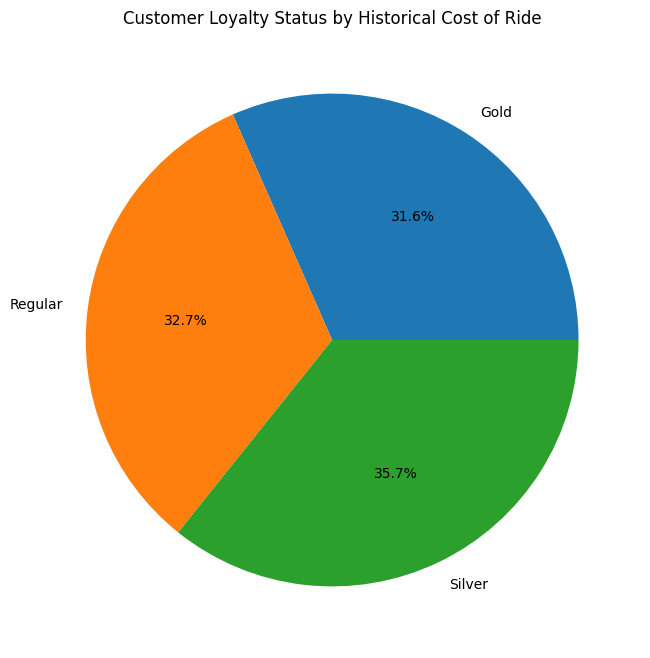

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("C:\\Users\priya\\Downloads\\dynamic_pricing.csv")


# Group by Customer_Loyalty_Status and calculate the sum of Historical_Cost_of_Ride
loyalty_cost = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].sum().reset_index()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(loyalty_cost['Historical_Cost_of_Ride'], labels=loyalty_cost['Customer_Loyalty_Status'], autopct='%1.1f%%')
plt.title('Customer Loyalty Status by Historical Cost of Ride')
plt.show()

In [22]:
# Define a function to convert column names to uppercase
import pandas as pd
def upperFunc(dataframe):
    dataframe.columns = dataframe.columns.str.upper()
    return dataframe

# Create a sample DataFrame
data = {
    "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
    "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
}
df = pd.DataFrame(data)

# Create a pipeline and apply the upperFunc
pipeline = df.pipe(upperFunc)

print(pipeline)

   NUMBER_OF_RIDERS  NUMBER_OF_DRIVERS LOCATION_CATEGORY  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   
5                59                 35             Urban   
6                93                 43          Suburban   
7                62                 39             Rural   
8                79                 14             Rural   
9                42                  6             Rural   

   HISTORICAL_COST_OF_RIDE  
0                  284.257  
1                  173.875  
2                  329.795  
3                  470.201  
4                  579.681  
5                  339.955  
6                  104.062  
7                  235.812  
8                  501.413  
9                  398.993  


In [23]:
# Function to find mean
def mean_by_group(dataframe, col):
    return dataframe.groupby(col).mean(numeric_only=True)

# Function to convert to uppercase
def uppercase_column_name(dataframe):
    dataframe.columns = dataframe.columns.str.upper()
    return dataframe

# Convert column names to uppercase
df = uppercase_column_name(df)

print("Original DataFrame:")
print(df)

print("\nMean by Location_Category:")
print(mean_by_group(df, 'LOCATION_CATEGORY'))

print("\nDataFrame with uppercase column names:")
print(df)

Original DataFrame:
   NUMBER_OF_RIDERS  NUMBER_OF_DRIVERS LOCATION_CATEGORY  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   
5                59                 35             Urban   
6                93                 43          Suburban   
7                62                 39             Rural   
8                79                 14             Rural   
9                42                  6             Rural   

   HISTORICAL_COST_OF_RIDE  
0                  284.257  
1                  173.875  
2                  329.795  
3                  470.201  
4                  579.681  
5                  339.955  
6                  104.062  
7                  235.812  
8                  501.413  
9                  398.993  


In [24]:
df = df.drop('LOCATION_CATEGORY', axis=1)

print("\nDataFrame after dropping LOCATION_CATEGORY:")
print(df)


DataFrame after dropping LOCATION_CATEGORY:
   NUMBER_OF_RIDERS  NUMBER_OF_DRIVERS  HISTORICAL_COST_OF_RIDE
0                90                 45                  284.257
1                58                 39                  173.875
2                42                 31                  329.795
3                89                 28                  470.201
4                78                 22                  579.681
5                59                 35                  339.955
6                93                 43                  104.062
7                62                 39                  235.812
8                79                 14                  501.413
9                42                  6                  398.993


In [32]:
# Add a new column
df['NEW_COLUMN'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print(df)

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   
5                59                 35             Urban   
6                93                 43          Suburban   
7                62                 39             Rural   
8                79                 14             Rural   
9                42                  6             Rural   

   Historical_Cost_of_Ride  NEW_COLUMN  
0                  284.257           1  
1                  173.875           2  
2                  329.795           3  
3                  470.201           4  
4                  579.681           5  
5                  339.955           6  
6                  104.062           7  
7          

# - Is it possible to build a data ingestion pipeline using pandas ? If yes, then how.

In [26]:



import pandas as pd

# Define a function to read data
def read_data(data):
    try:
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error reading data: {e}")

# Define a function to clean and preprocess the data
def clean_data(df):
    try:
        # Handle missing values
        df = df.dropna()
        
        return df
    except Exception as e:
        print(f"Error cleaning data: {e}")

# Define a function to transform the data
def transform_data(df):
    try:
        # Create a new column 'Cost_Category'
        df['Cost_Category'] = pd.cut(df['Historical_Cost_of_Ride'], bins=[0, 200, 400, float('inf')], labels=['Low', 'Medium', 'High'])
        
        return df
    except Exception as e:
        print(f"Error transforming data: {e}")

# Define a function to store the data
def store_data(df, file_path):
    try:
        df.to_csv(file_path, index=False)
    except Exception as e:
        print(f"Error storing data: {e}")

# Data
data = {
    "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
    "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Customer_Loyalty_Status": ["Silver", "Silver", "Silver", "Regular", "Regular", "Silver", "Regular", "Gold", "Silver", "Silver"],
    "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
}

# Use the functions to build the data ingestion pipeline
df = read_data(data)
df = clean_data(df)
df = transform_data(df)
store_data(df, 'transformed_data.csv')

print(df)




   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   
5                59                 35             Urban   
6                93                 43          Suburban   
7                62                 39             Rural   
8                79                 14             Rural   
9                42                  6             Rural   

  Customer_Loyalty_Status  Historical_Cost_of_Ride Cost_Category  
0                  Silver                  284.257        Medium  
1                  Silver                  173.875           Low  
2                  Silver                  329.795        Medium  
3                 Regular                  470.201          High  
4   

In [27]:
import pandas as pd
df = pd.read_csv("C:\\Users\\priya\\Downloads\\dynamic_pricing.csv")
df.head(3)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Unnamed: 10
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,NaN
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,NaN
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,NaN


# Clean the dataset by dropping duplicates and missing values and reset the index. 

In [28]:
# data cleaning
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)

# Convert types
df['Location_Category'] = df['Location_Category'].astype('str')

# Data analysis
new_df = df.groupby('Location_Category')['Number_of_Riders'].mean()

# Data visualization
if not new_df.empty:
    new_df.plot(kind='bar', figsize=(10, 5), title='Average Number of Riders by Location Category')
    plt.show()
else:
    print("No data to plot.")

    


No data to plot.


Text(0, 0.5, 'Averag')

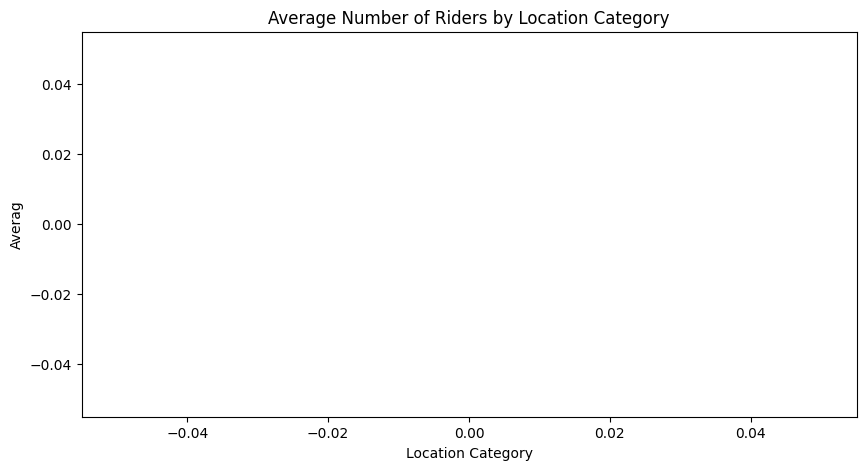

In [29]:
# Calculate average number of riders for each location category
import numpy as np
import matplotlib.pyplot as plt
avg_riders = df.groupby('Location_Category')['Number_of_Riders'].mean().reset_index()

# Plot the average number of riders for each location category
plt.figure(figsize=(10, 5))
plt.bar(avg_riders['Location_Category'], avg_riders['Number_of_Riders'], color=['blue', 'green', 'red'])
plt.title('Average Number of Riders by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Averag')


# Calculate average historical cost of ride for each location category

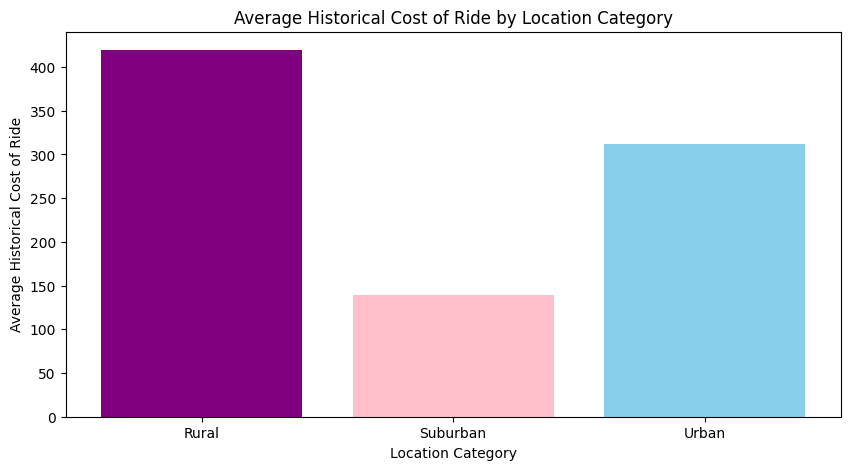

In [30]:

import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
    "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
}

df = pd.DataFrame(data)

# Calculate average historical cost of ride for each location category
avg_cost = df.groupby('Location_Category')['Historical_Cost_of_Ride'].mean().reset_index()

# Plot the average historical cost of ride for each location category
plt.figure(figsize=(10, 5))
plt.bar(avg_cost['Location_Category'], avg_cost['Historical_Cost_of_Ride'], color=['purple', 'pink', 'skyblue'])
plt.title('Average Historical Cost of Ride by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Average Historical Cost of Ride')
plt.show()

- Rural areas have the highest average historical cost of ride (around 419.15)
- Suburban areas have the lowest average historical cost of ride (around 138.97)
- Urban areas have an average historical cost of ride between Rural and Suburban areas (around 312.11)

In [31]:
rides_per_category = df['Location_Category'].value_counts()
print(rides_per_category)


Location_Category
Rural       6
Urban       2
Suburban    2
Name: count, dtype: int64


conclusion= we can see that rural areas have the highest average historical cost of ride 